<a href="https://colab.research.google.com/github/Michaelzats/Assets-optimisation-predictor/blob/main/Assets_optimisation_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assets optimisation predictor

The following tool optmises the portfolio from the given assets by finding the best allocation of the assets by Max Sharpe Ratio and Min Volatility. Besides that, the tool will give you the exaxt number of the assets to buy.

The required packages

In [1]:
!pip install -q yfinance
!pip install pandas-datareader
!pip install pulp
!pip install --upgrade pandas
!pip install PyPortfolioOpt
!pip install --upgrade pandas-datareader



     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 6.4 MB 55.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 14.2 MB 12.0 MB/s 
     |████████████████████████████████| 61 kB 7.4 MB/s 
     |████████████████████████████████| 2.8 MB 42.7 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31
     |████████████████████████████████| 109 kB 18.9 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
from pandas_datareader import data
from pulp import *
import requests
from pandas_datareader import data as pdr
import yfinance as yfin
from pypfopt.expected_returns import mean_historical_return
from pypfopt import expected_returns
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from pypfopt.efficient_frontier import EfficientFrontier 
from pypfopt import risk_models 
from pypfopt import expected_returns
from pypfopt.cla import CLA
import pypfopt.plotting as pplt
from matplotlib.ticker import FuncFormatter
import os


In [8]:
#Put the required assets 
assets = ['BTC-USD','ETH-USD','AAPL','MSFT','SPCE','GOOG']



In [18]:
initial_date = "2019-04-20"
today = datetime.today().strftime('%Y-%m-%d')


In [19]:
df_prices = pd.DataFrame()


In [20]:
# We give the function the empty dataframe, the name of the assets, the initial date and the end date:


def datosYahoo(dataframe,asset_list,start,finish):
    for i in asset_list:
        dataframe[i] = pdr.get_data_yahoo(i, start= initial_date , end=finish)["Adj Close"]
    return dataframe
df = datosYahoo(df_prices,assets,initial_date,today)
df

,BTC-USD,ETH-USD,AAPL,MSFT,SPCE,GOOG
Date,,,,,,
2019-04-20,5337.886230,173.751266,NaN,NaN,NaN,NaN
2019-04-21,5314.531250,170.046524,NaN,NaN,NaN,NaN
2019-04-22,5399.365234,171.874664,49.714687,119.938255,10.23,1248.839966
2019-04-23,5572.362305,171.447800,50.431736,121.566391,10.23,1264.550049
2019-04-24,5464.866699,165.826096,50.353958,121.149673,10.24,1256.000000
...,...,...,...,...,...,...
2022-05-08,34059.265625,2517.459961,NaN,NaN,NaN,NaN
2022-05-09,30296.953125,2245.430420,152.059998,264.579987,6.07,2261.679932
2022-05-10,31022.906250,2343.510986,154.509995,269.500000,5.85,2291.689941


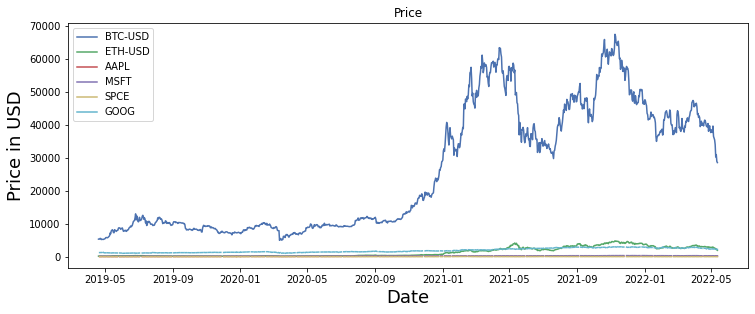

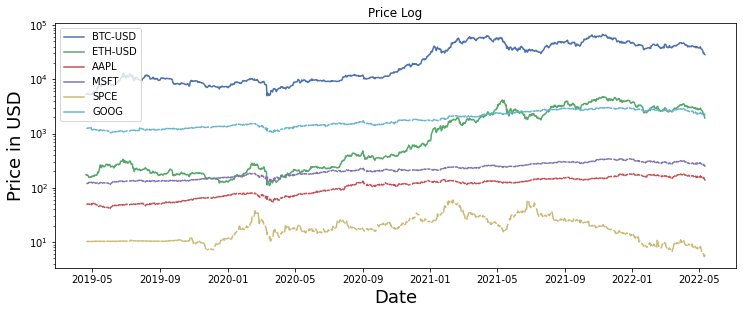

In [21]:
plt.figure(figsize=(12.2,4.5)) 
for i in df.columns.values:
    plt.plot( df[i],  label=i)
plt.title('Price')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price in USD',fontsize=18)
plt.legend(df.columns.values, loc='upper left')

plt.show()


plt.figure(figsize=(12.2,4.5)) 
for i in df.columns.values:
    plt.plot( df[i],  label=i)
plt.title('Price Log')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price in USD',fontsize=18)
plt.legend(df.columns.values, loc='upper left')
plt.yscale('log')

plt.show()




In [22]:
#Checking if any NaN values in the data
nullin_df = pd.DataFrame(df,columns=assets)
print(nullin_df.isnull().sum())


BTC-USD      0
ETH-USD      0
AAPL       346
MSFT       346
SPCE       346
GOOG       346
dtype: int64


In [23]:
#Annluaized Return
mu = expected_returns.mean_historical_return(df) 
#Sample Variance of Portfolio
Sigma = risk_models.sample_cov(df)

In [24]:
#Max Sharpe Ratio - Tangent to the EF
ef = EfficientFrontier(mu, Sigma, weight_bounds=(0,1)) #weight bounds in negative allows shorting of stocks
sharpe_pfolio=ef.max_sharpe() #May use add objective to ensure minimum zero weighting to individual stocks
sharpe_pwt=ef.clean_weights()
print(sharpe_pwt)

OrderedDict([('BTC-USD', 0.0), ('ETH-USD', 0.29171), ('AAPL', 0.70829), ('MSFT', 0.0), ('SPCE', 0.0), ('GOOG', 0.0)])


In [25]:
ef.portfolio_performance(verbose=True, risk_free_rate = 0.27)
# 2year risk free rate - Treasury Yield 

Expected annual return: 39.7%
Annual volatility: 34.1%
Sharpe Ratio: 1.10


/usr/local/lib/python3.7/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  UserWarning,


(0.39679123259907984, 0.3410226083074571, 1.1048863723996112)

In [26]:
#Min Volatility Portfolio
ef1 = EfficientFrontier(mu, Sigma, weight_bounds=(0,1)) #weight bounds in negative allows shorting of stocks
minvol=ef1.min_volatility()
minvol_pwt=ef1.clean_weights()
print(minvol_pwt)

OrderedDict([('BTC-USD', 0.05074), ('ETH-USD', 0.0), ('AAPL', 0.19809), ('MSFT', 0.26565), ('SPCE', 0.0), ('GOOG', 0.48553)])


In [27]:
ef1.portfolio_performance(verbose=True, risk_free_rate = 0.27)

Expected annual return: 19.1%
Annual volatility: 24.3%
Sharpe Ratio: -0.32


(0.19128492537956354, 0.24273899260122583, -0.3242786574044592)

In [28]:
from pypfopt.cla import CLA
from pypfopt import discrete_allocation

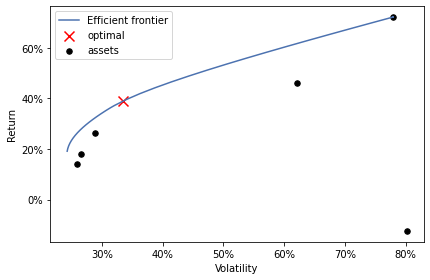

In [29]:
cl_obj = CLA(mu, Sigma)
ax = pplt.plot_efficient_frontier(cl_obj, showfig = False)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

In [30]:
latest_prices = discrete_allocation.get_latest_prices(df)
# Allocate Portfolio Value in $ as required to show number of shares/stocks to buy, also bounds for shorting will affect allocation
#Min Volatility Portfolio Allocation $10000
allocation_minv, rem_minv = discrete_allocation.DiscreteAllocation(minvol_pwt, latest_prices, total_portfolio_value=10000).lp_portfolio() 
print(allocation_minv)
print("Leftover Fund value in$ after building minimum volatility portfolio is ${:.2f}".format(rem_minv))


{'AAPL': 15, 'MSFT': 11, 'GOOG': 2}
Leftover Fund value in$ after building minimum volatility portfolio is $690.90


In [31]:
#Max Sharpe Ratio Portfolio Allocation $10000
latest_prices1 = discrete_allocation.get_latest_prices(df)
allocation_shp, rem_shp = discrete_allocation.DiscreteAllocation(sharpe_pwt, latest_prices1, total_portfolio_value=10000).lp_portfolio() 
print(allocation_shp)
print("Leftover Fund value in$ after building Max Sharpe ratio portfolio is ${:.2f}".format(rem_shp))



{'ETH-USD': 1, 'AAPL': 51}
Leftover Fund value in$ after building Max Sharpe ratio portfolio is $935.64
